# Exploratory Data Analysis Household Pulse Survey

### 1. Studying the dataset

Public Use Data File (PUF) includes a replicate weight data file, and a data dictionary for every new release of the survey. The shape of the datasets has changed over time, depending on the number of surveyed people and the addition of new variables. 

#### Features
- 20 weeks, from April 23rd to December 7th
- Surveyed people between 50k-100k per survey
- Variables between 82 to 188
- Demographic variables
- Index variables: SCRAM (ID) and WEEK
- Spending variables
- Food variables
- Shopping variables
- Telework
- Trips
- Health
- Work variables
- Missing data designed as -88 and -99
- Mostly categorical data
- Require use of data dictionary to interpretate the name of columns and categories

Some interesting variables related to the spending of the stimulus payment can be found during weeks 7 to 12 from Phase 1 of the Survey and changes in shopping patterns are part of the new questions incorporated in Phase 2, from week 13 onwards. Although spending and shopping variables are not asked simultaneously to the population, they offer valious insights for our study as the survey tries to be representative along demographic variables. and they are pre-processed separately.

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df1 = pd.read_csv('../data/interim/census/household_shopping1.csv')
df2 = pd.read_csv('../data/interim/census/household_shopping2.csv')
df3 = pd.read_csv('../data/interim/census/household_shopping3.csv')
df4 = pd.read_csv('../data/interim/census/household_shopping4.csv')
df5 = pd.read_csv('../data/interim/census/household_shopping5.csv')
df6 = pd.read_csv('../data/interim/census/household_shopping6.csv')
df7 = pd.read_csv('../data/interim/census/household_shopping7.csv')
df8 = pd.read_csv('../data/interim/census/household_shopping8.csv')

In [3]:
df1.replace({-99: np.nan, -88: np.nan}, inplace=True)
df2.replace({-99: np.nan, -88: np.nan}, inplace=True)
df3.replace({-99: np.nan, -88: np.nan}, inplace=True)
df4.replace({-99: np.nan, -88: np.nan}, inplace=True)
df5.replace({-99: np.nan, -88: np.nan}, inplace=True)
df6.replace({-99: np.nan, -88: np.nan}, inplace=True)
df7.replace({-99: np.nan, -88: np.nan}, inplace=True)
df8.replace({-99: np.nan, -88: np.nan}, inplace=True)

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
#df_scram drops the duplicates
df_scram = df.drop_duplicates()

In [5]:
print('Original size: {}'.format(df.shape))
print('Size dropping duplicates: {}'.format(df_scram.shape))

Original size: (705844, 44)
Size dropping duplicates: (705844, 44)


### PURPOSE EDA:
Overall expenditures and changes in consumer Behavior Relevant demographics: gender, states, cities, income, children at home, marital status.

### BASIC ANALYSIS: COMPOSITION OF THE SURVEY

### SPENDING VARIABLES
- Plotbar EIP: Use of Economic Impact Payment (Stimulus) and plot EIPSPND (Spending use of Economic Impact Payment). - Percent change of EIPSPND over time split by food and others (weekly and grouping by demographics).
- Plot Difficulty with expenses (EXPNS_DIF)

### SHOPPING VARIABLES
- Plot CHNGHOW1-CHNGHOW12: Spending and shopping change
- Plot Purchases modality
- Cash/credit card
- Resumed/avoided eating at restaurants
- Fewer trips to stores and trips transit.
- Why spending/shopping changed: Barplot reasons split by demographics

Defining useful functions:

In [6]:
def generation_(TBIRTH_YEAR):
# Function to determine generation by birthday year. 
# According to the survey, all persons born before 2002.
    if TBIRTH_YEAR in list(range(1946, 1955)):
        return 'Baby Boomer'
    elif TBIRTH_YEAR in list(range(1955, 1965)):
        return 'Generation Jones'
    elif TBIRTH_YEAR in list(range(1965, 1981)):
        return 'Generation X'
    elif TBIRTH_YEAR in list(range(1981, 1997)):
        return 'Millennials'
    elif TBIRTH_YEAR in list(range(1997, 2010)):
        return 'Generation Z'
    else:
        return 'Silent Generation'

In [7]:
def get_rctable(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    chi2, p, dof, ex = chi2_contingency(res)
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output.style.set_caption(f'{var1} vs. {var2}: Chi-square p-value={p:.5f}')

In [8]:
def get_rct(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output

In [9]:
def add_dates_start_end_inplace(data):
    data['DATE_START'] = data['WEEK'].apply(lambda idx: dates_from_weeks[idx][0])
    data['DATE_END']   = data['WEEK'].apply(lambda idx: dates_from_weeks[idx][1])
    return data

In [10]:
def purchase_modality(a, b, c):
    if (a == 1) & (b != 1) & (c != 1):
        return 'Online'
    elif (a == 1) & (b == 1) & (c != 1):
        return 'Online + Pickup'
    elif (a != 1) & (b == 1) & (c != 1):
        return 'Pickup'
    elif (a != 1) & (b != 1) & (c == 1):
        return 'In-store'
    else:
        return None

#### Legends by demographic variables

In [11]:
race = ['White', 
              'Black', 
              'Asian',
              'Other']

educ = ['Less than \nhigh school', 
               'Some high \nschool',
               'High school',
               'Some college',
               'Associate',
               'Bachelor',
               'Graduate']

marital = ['Married',
                  'Widowed',
                  'Divorced',
                  'Separated',
                  'Never married']

region = ['Northeast', 
          'South', 
          'Midwest', 
          'West']

diff_expnd = ['Not at all',
              'A little', 
              'Somewhat',
              'Very']

generation = ['Silent \nGeneration',
              'Baby \nBoomer',
              'Generation \nJones',
              'Generation X',
              'Generation Z',
              'Millennials']


msa = { '35620': 'New York-Newark-Jersey City',
        '31080': 'Los Angeles-Long Beach-Anaheim',
        '16980': 'Chicago-Naperville-Elgin',
        '19100': 'Dallas-Fort Worth-Arlington',
        '26420': 'Houston-The Woodlands-Sugar Land',
        '47900': 'Washington-Arlington-Alexandria',
        '33100': 'Miami-Fort Lauderdale-Pompano Beach',
        '37980': 'Philadelphia-Camden-Wilmington',
        '12060': 'Atlanta-Sandy Springs-Alpharetta',
        '38060': 'Phoenix-Mesa-Chandler',
        '14460': 'Boston-Cambridge-Newton',
        '41860': 'San Francisco-Oakland-Berkeley',
        '40140': 'Riverside-San Bernardino-Ontario',
        '19820': 'Detroit-Warren-Dearborn',
        '42660': 'Seattle-Tacoma-Bellevue'}

dates_from_weeks = {
     1: ('2020-04-23', '2020-05-05'),
     2: ('2020-05-07', '2020-05-12'),
     3: ('2020-05-14', '2020-05-19'),
     4: ('2020-05-21', '2020-05-26'),
     5: ('2020-05-28', '2020-06-02'),
     6: ('2020-06-04', '2020-06-09'),
     7: ('2020-06-11', '2020-06-16'),
     8: ('2020-06-18', '2020-06-23'),
     9: ('2020-06-25', '2020-06-30'),
    10: ('2020-07-02', '2020-07-07'),
    11: ('2020-07-09', '2020-07-14'),
    12: ('2020-07-16', '2020-07-21'),
    13: ('2020-08-19', '2020-08-31'),
    14: ('2020-09-02', '2020-09-14'),
    15: ('2020-09-16', '2020-09-28'),
    16: ('2020-09-30', '2020-10-12'),
    17: ('2020-10-14', '2020-10-26'),
    18: ('2020-10-28', '2020-11-09'),
    19: ('2020-11-11', '2020-11-23'),
    20: ('2020-11-25', '2020-12-07')    
}

## COMPOSITION OF THE SURVEY

In [12]:
df.columns

Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'REGION', 'TBIRTH_YEAR',
       'EGENDER', 'RHISPANIC', 'RRACE', 'EEDUC', 'MS', 'THHLD_NUMPER',
       'THHLD_NUMKID', 'THHLD_NUMADLT', 'EXPNS_DIF', 'CHNGHOW1', 'CHNGHOW2',
       'CHNGHOW3', 'CHNGHOW4', 'CHNGHOW5', 'CHNGHOW6', 'CHNGHOW7', 'CHNGHOW8',
       'CHNGHOW9', 'CHNGHOW10', 'CHNGHOW11', 'CHNGHOW12', 'WHYCHNGD1',
       'WHYCHNGD2', 'WHYCHNGD3', 'WHYCHNGD4', 'WHYCHNGD5', 'WHYCHNGD6',
       'WHYCHNGD7', 'WHYCHNGD8', 'WHYCHNGD9', 'WHYCHNGD10', 'WHYCHNGD11',
       'WHYCHNGD12', 'FEWRTRIPS', 'FEWRTRANS', 'PLNDTRIPS', 'CNCLDTRPS',
       'INCOME'],
      dtype='object')

In [13]:
df.groupby('REGION').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
REGION,,,,,,,,,,,,,,,,,,,,,
1.0,0.155133,0.155133,0.155133,0.069099,0.155133,0.155133,0.155133,0.155133,0.155133,0.153618,...,0.003083,0.026886,0.006405,0.046823,0.001979,0.141476,0.141826,0.141924,0.112329,0.119304
2.0,0.311339,0.311339,0.311339,0.110884,0.311339,0.311339,0.311339,0.311339,0.311339,0.308496,...,0.006611,0.048576,0.012669,0.093536,0.005139,0.284442,0.285203,0.285404,0.222791,0.239570
3.0,0.205397,0.205397,0.205397,0.033735,0.205397,0.205397,0.205397,0.205397,0.205397,0.203641,...,0.004454,0.029966,0.008063,0.058235,0.003157,0.188591,0.189029,0.189053,0.147149,0.160042
4.0,0.328131,0.328131,0.328131,0.101796,0.328131,0.328131,0.328131,0.328131,0.328131,0.325198,...,0.006666,0.057310,0.012472,0.105614,0.004403,0.304278,0.304876,0.305046,0.246267,0.261857


In [14]:
df.groupby('EGENDER').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,RHISPANIC,RRACE,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
EGENDER,,,,,,,,,,,,,,,,,,,,,
1.0,0.408525,0.408525,0.408525,0.133494,0.408525,0.408525,0.408525,0.408525,0.408525,0.404769,...,0.010090,0.067145,0.013793,0.119437,0.008791,0.375733,0.376687,0.376821,0.295078,0.320612
2.0,0.591475,0.591475,0.591475,0.182020,0.591475,0.591475,0.591475,0.591475,0.591475,0.586183,...,0.010723,0.095592,0.025814,0.184772,0.005887,0.543055,0.544248,0.544606,0.433458,0.460161


In [15]:
df.groupby('RRACE').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
RRACE,,,,,,,,,,,,,,,,,,,,,
1.0,0.821803,0.821803,0.821803,0.235855,0.821803,0.821803,0.821803,0.821803,0.821803,0.814572,...,0.016889,0.129745,0.030569,0.241779,0.012483,0.760603,0.762181,0.762446,0.609655,0.651390
2.0,0.078668,0.078668,0.078668,0.037275,0.078668,0.078668,0.078668,0.078668,0.078668,0.077768,...,0.001754,0.012535,0.004005,0.026502,0.000833,0.068730,0.069039,0.069194,0.051055,0.054462
3.0,0.049536,0.049536,0.049536,0.027295,0.049536,0.049536,0.049536,0.049536,0.049536,0.049005,...,0.001054,0.012346,0.002363,0.018610,0.000526,0.044300,0.044447,0.044484,0.033822,0.037229
4.0,0.049993,0.049993,0.049993,0.015090,0.049993,0.049993,0.049993,0.049993,0.049993,0.049607,...,0.001116,0.008111,0.002671,0.017318,0.000836,0.045154,0.045266,0.045303,0.034005,0.037691


In [16]:
race_reg = df.groupby(['REGION', 'RRACE']).count()
race_reg = (race_reg/race_reg.groupby(level=[0]).sum())*100
race_reg

SCRAM       WEEK     EST_ST    EST_MSA  TBIRTH_YEAR  \
REGION RRACE                                                            
1.0    1.0    84.976256  84.976256  84.976256  78.676727    84.976256   
       2.0     6.626484   6.626484   6.626484   9.821008     6.626484   
       3.0     4.945205   4.945205   4.945205   7.768642     4.945205   
       4.0     3.452055   3.452055   3.452055   3.733623     3.452055   
2.0    1.0    76.781627  76.781627  76.781627  70.210945    76.781627   
       2.0    15.005665  15.005665  15.005665  18.944127    15.005665   
       3.0     3.825589   3.825589   3.825589   6.623481     3.825589   
       4.0     4.387118   4.387118   4.387118   4.221447     4.387118   
3.0    1.0    88.358923  88.358923  88.358923  78.120275    88.358923   
       2.0     5.575329   5.575329   5.575329  12.527297     5.575329   
       3.0     2.634193   2.634193   2.634193   5.828994     2.634193   
       4.0     3.431555   3.431555   3.431555   3.523434     3.431555   
4.0    1.0    82.113389  82.113389  82.113389  75.919947    82.113389   
       2.0     3.113869   3.113869   3.113869   5.163391     3.113869   
       3.0     7.479848   7.479848   7.479848  12.393531     7.479848   
       4.0     7.292894   7.292894   7.292894   6.523131     7.292894   

                EGENDER  RHISPANIC      EEDUC         MS  THHLD_NUMPER  ...  \
REGION RRACE                                                            ...   
1.0    1.0    84.976256  84.976256  84.976256  85.004150     84.976256  ...   
       2.0     6.626484   6.626484   6.626484   6.614406      6.626484  ...   
       3.0     4.945205   4.945205   4.945205   4.930370      4.945205  ...   
       4.0     3.452055   3.452055   3.452055   3.451074      3.452055  ...   
2.0    1.0    76.781627  76.781627  76.781627  76.811022     76.781627  ...   
       2.0    15.005665  15.005665  15.005665  14.978645     15.005665  ...   
       3.0     3.825589   3.825589   3.825589   3.817681      3.825589  ...   
       4.0     4.387118   4.387118   4.387118   4.392652      4.387118  ...   
3.0    1.0    88.358923  88.358923  88.358923  88.381720     88.358923  ...   
       2.0     5.575329   5.575329   5.575329   5.556599      5.575329  ...   
       3.0     2.634193   2.634193   2.634193   2.625592      2.634193  ...   
       4.0     3.431555   3.431555   3.431555   3.436089      3.431555  ...   
4.0    1.0    82.113389  82.113389  82.113389  82.119378     82.113389  ...   
       2.0     3.113869   3.113869   3.113869   3.100562      3.113869  ...   
       3.0     7.479848   7.479848   7.479848   7.474547      7.479848  ...   
       4.0     7.292894   7.292894   7.292894   7.305512      7.292894  ...   

              WHYCHNGD8  WHYCHNGD9  WHYCHNGD10  WHYCHNGD11  WHYCHNGD12  \
REGION RRACE                                                             
1.0    1.0    83.961397  82.626337   81.973015   82.535552   87.616321   
       2.0     8.272059   6.333983    8.117673    7.509834    5.153901   
       3.0     4.641544   7.677715    5.817297    5.894100    3.865426   
       4.0     3.125000   3.361964    4.092015    4.060514    3.364352   
2.0    1.0    75.803686  73.721819   70.610602   73.639090   82.630273   
       2.0    15.173596  15.416922   19.123239   16.851958    9.539564   
       3.0     4.157737   6.466008    4.596287    4.633304    2.701958   
       4.0     4.864981   4.395252    5.669873    4.875648    5.128205   
3.0    1.0    87.372774  86.898965   84.449130   86.451770   88.958707   
       2.0     5.916031   5.361449    7.239501    6.369055    4.219031   
       3.0     2.989822   4.425323    3.531892    3.342659    2.513465   
       4.0     3.721374   3.314264    4.779476    3.836516    4.308797   
4.0    1.0    80.977683  79.706813   76.689765   79.447865   83.912484   
       2.0     3.485654   3.030752    3.839600    3.326760    2.445302   
       3.0     7.545165  10.145357    9.008293    9.061398    5.244530   
       4.0     7.99149

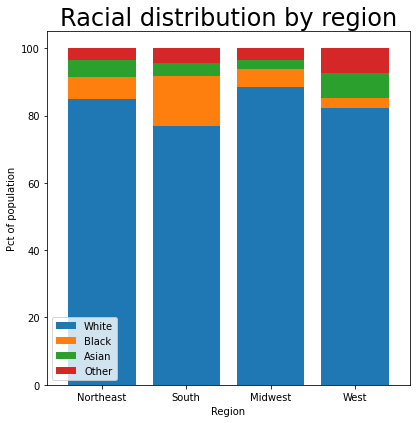

In [17]:
race_reg = df.groupby(['REGION', 'RRACE']).count()
race_reg = (race_reg/race_reg.groupby(level=[0]).sum())*100

test = race_reg.SCRAM.unstack('RRACE').fillna(0)
legend = race

labels = region

fig, ax = plt.subplots(figsize=(6.5, 6.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.rcParams.update({'font.size': 20})
_ = plt.title('Racial distribution by region')
_ = plt.xlabel('Region')
_ = plt.ylabel('Pct of population')

In [18]:
df.groupby('EEDUC').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
EEDUC,,,,,,,,,,,,,,,,,,,,,
1.0,0.006021,0.006021,0.006021,0.001938,0.006021,0.006021,0.006021,0.006021,0.006021,0.005928,...,0.000115,0.000156,0.000245,0.001514,0.000140,0.004942,0.004988,0.004995,0.002345,0.003790
2.0,0.013737,0.013737,0.013737,0.004409,0.013737,0.013737,0.013737,0.013737,0.013737,0.013582,...,0.000235,0.000422,0.000476,0.003706,0.000164,0.011409,0.011500,0.011524,0.005592,0.008778
3.0,0.115861,0.115861,0.115861,0.029089,0.115861,0.115861,0.115861,0.115861,0.115861,0.114668,...,0.002156,0.005853,0.004487,0.031974,0.001544,0.102782,0.103173,0.103241,0.062294,0.082488
4.0,0.216871,0.216871,0.216871,0.060329,0.216871,0.216871,0.216871,0.216871,0.216871,0.214936,...,0.004424,0.022971,0.008935,0.069297,0.003210,0.196480,0.196908,0.196978,0.145606,0.162780
5.0,0.105628,0.105628,0.105628,0.026815,0.105628,0.105628,0.105628,0.105628,0.105628,0.104687,...,0.002427,0.011272,0.004470,0.034080,0.001560,0.096851,0.097080,0.097116,0.073963,0.081565
6.0,0.292531,0.292531,0.292531,0.099545,0.292531,0.292531,0.292531,0.292531,0.292531,0.290057,...,0.006504,0.060308,0.011226,0.089221,0.004483,0.271669,0.272181,0.272332,0.230593,0.235260
7.0,0.249351,0.249351,0.249351,0.093390,0.249351,0.249351,0.249351,0.249351,0.249351,0.247094,...,0.004952,0.061756,0.009768,0.074416,0.003576,0.234655,0.235106,0.235240,0.208144,0.206112


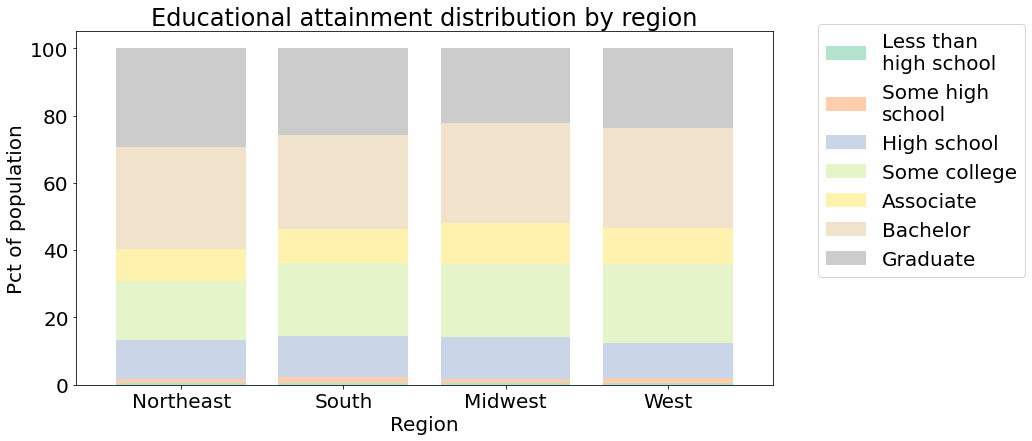

In [19]:
educ_reg = df.groupby(['REGION', 'EEDUC']).count()
educ_reg = (educ_reg/educ_reg.groupby(level=[0]).sum())*100

test = educ_reg.SCRAM.unstack('EEDUC').fillna(0)
legend = educ

labels = region

fig, ax = plt.subplots(figsize=(12.5, 6.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap=plt.cm.get_cmap('Pastel2', 7))
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
#_ = plt.legend(legend)
_ = plt.title('Educational attainment distribution by region')
_ = plt.rcParams.update({'font.size': 20})
_ = plt.xlabel('Region')
_ = plt.ylabel('Pct of population')
_ = ax.legend(legend, bbox_to_anchor=(1.05, 1.05))

In [20]:
df.groupby('MS').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
MS,,,,,,,,,,,,,,,,,,,,,
1.0,0.574800,0.574800,0.574800,0.175706,0.574800,0.574800,0.574800,0.574800,0.574800,0.574800,...,0.012581,0.100699,0.021746,0.170414,0.009468,0.534284,0.535392,0.535671,0.444090,0.455883
2.0,0.048675,0.048675,0.048675,0.014281,0.048675,0.048675,0.048675,0.048675,0.048675,0.048675,...,0.000708,0.002907,0.001078,0.015369,0.000696,0.045443,0.045640,0.045667,0.031073,0.038371
3.0,0.150294,0.150294,0.150294,0.043799,0.150294,0.150294,0.150294,0.150294,0.150294,0.150294,...,0.002926,0.019268,0.005667,0.051904,0.001914,0.139675,0.140064,0.140123,0.103529,0.120248
4.0,0.018233,0.018233,0.018233,0.006200,0.018233,0.018233,0.018233,0.018233,0.018233,0.018233,...,0.000351,0.002217,0.000793,0.006137,0.000197,0.016338,0.016393,0.016402,0.011297,0.013647
5.0,0.198950,0.198950,0.198950,0.072556,0.198950,0.198950,0.198950,0.198950,0.198950,0.198950,...,0.004179,0.037055,0.010148,0.058806,0.002326,0.178531,0.178888,0.178998,0.135142,0.149396


In [21]:
df.groupby('THHLD_NUMPER').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
THHLD_NUMPER,,,,,,,,,,,,,,,,,,,,,
1.0,0.168152,0.168152,0.168152,0.054508,0.168152,0.168152,0.168152,0.168152,0.168152,0.168152,...,0.003142,0.021176,0.005233,0.051096,0.002093,0.155944,0.156401,0.156509,0.113579,0.137015
2.0,0.375414,0.375414,0.375414,0.111183,0.375414,0.375414,0.375414,0.375414,0.375414,0.375414,...,0.007441,0.055079,0.012803,0.113203,0.005945,0.349002,0.349742,0.349941,0.282839,0.300565
3.0,0.174482,0.174482,0.174482,0.057244,0.174482,0.174482,0.174482,0.174482,0.174482,0.174482,...,0.003769,0.032958,0.007930,0.054632,0.002362,0.159029,0.159394,0.159430,0.127191,0.134210
4.0,0.157946,0.157946,0.157946,0.053483,0.157946,0.157946,0.157946,0.157946,0.157946,0.157946,...,0.003603,0.033537,0.007631,0.047577,0.002244,0.143610,0.143907,0.143969,0.118236,0.119226
5.0,0.073122,0.073122,0.073122,0.023375,0.073122,0.073122,0.073122,0.073122,0.073122,0.073122,...,0.001615,0.012765,0.003484,0.022166,0.001078,0.065741,0.065891,0.065937,0.052252,0.053515
6.0,0.029790,0.029790,0.029790,0.009206,0.029790,0.029790,0.029790,0.029790,0.029790,0.029790,...,0.000670,0.004528,0.001429,0.009015,0.000460,0.026745,0.026818,0.026843,0.020726,0.021527
7.0,0.011245,0.011245,0.011245,0.003502,0.011245,0.011245,0.011245,0.011245,0.011245,0.011245,...,0.000265,0.001524,0.000547,0.003553,0.000196,0.010043,0.010065,0.010076,0.007605,0.008036
8.0,0.004791,0.004791,0.004791,0.001444,0.004791,0.004791,0.004791,0.004791,0.004791,0.004791,...,0.000105,0.000625,0.000237,0.001557,0.000086,0.004313,0.004334,0.004335,0.003168,0.003413
9.0,0.001866,0.001866,0.001866,0.000579,0.001866,0.001866,0.001866,0.001866,0.001866,0.001866,...,0.000034,0.000208,0.000085,0.000584,0.000035,0.001658,0.001663,0.001663,0.001206,0.001278


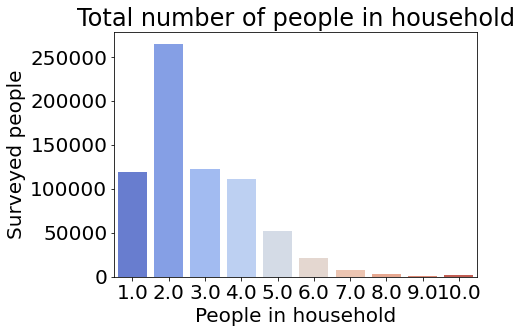

In [22]:
fig, ax = plt.subplots(figsize=(6.5, 4.5))
_ = sns.countplot(df.THHLD_NUMPER, palette='coolwarm')
_ = plt.title('Total number of people in household')
_ = plt.xlabel('People in household')
_ = plt.ylabel('Surveyed people')
_ = plt.rcParams.update({'font.size': 16})

In [23]:
df.groupby('THHLD_NUMKID').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
THHLD_NUMKID,,,,,,,,,,,,,,,,,,,,,
0.0,0.638603,0.638603,0.638603,0.202383,0.638603,0.638603,0.638603,0.638603,0.638603,0.638603,...,0.012865,0.093974,0.022760,0.195438,0.009576,0.591197,0.592598,0.592920,0.465169,0.510881
1.0,0.157842,0.157842,0.157842,0.051018,0.157842,0.157842,0.157842,0.157842,0.157842,0.157842,...,0.003436,0.029274,0.007223,0.049033,0.002118,0.143251,0.143586,0.143665,0.113602,0.118135
2.0,0.129336,0.129336,0.129336,0.042138,0.129336,0.129336,0.129336,0.129336,0.129336,0.129336,...,0.002807,0.027655,0.006088,0.038432,0.001704,0.117685,0.117940,0.117984,0.097228,0.097660
3.0,0.049389,0.049389,0.049389,0.013963,0.049389,0.049389,0.049389,0.049389,0.049389,0.049389,...,0.001026,0.008492,0.002332,0.014400,0.000714,0.044422,0.044503,0.044545,0.035508,0.036218
4.0,0.016304,0.016304,0.016304,0.004021,0.016304,0.016304,0.016304,0.016304,0.016304,0.016304,...,0.000377,0.002338,0.000734,0.004577,0.000278,0.014673,0.014723,0.014723,0.011470,0.011936
5.0,0.008526,0.008526,0.008526,0.001991,0.008526,0.008526,0.008526,0.008526,0.008526,0.008526,...,0.000303,0.001004,0.000472,0.002328,0.000288,0.007560,0.007585,0.007591,0.005559,0.005943


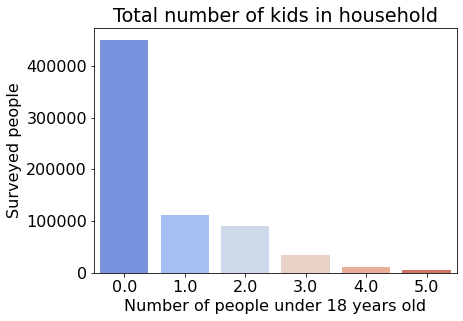

In [24]:
fig, ax = plt.subplots(figsize=(6.5, 4.5))
_ = sns.countplot(df.THHLD_NUMKID, palette='coolwarm')
_ = plt.title('Total number of kids in household')
_ = plt.xlabel('Number of people under 18 years old')
_ = plt.ylabel('Surveyed people')
_ = plt.rcParams.update({'font.size': 16})

<AxesSubplot:>

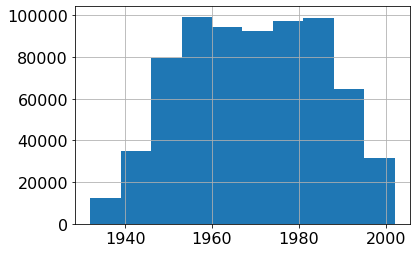

In [25]:
df.TBIRTH_YEAR.hist()

In [26]:
df['GENERATION'] = df.TBIRTH_YEAR.apply(lambda x: generation_(x))

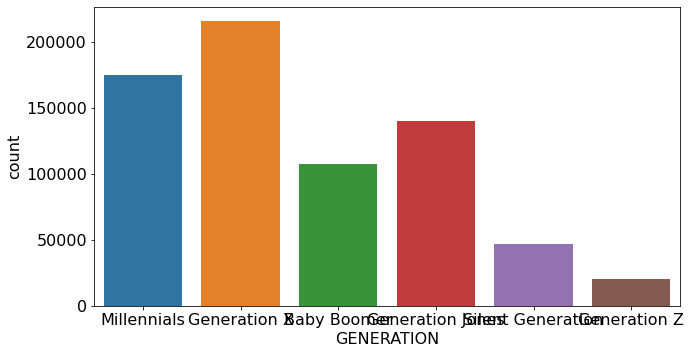

In [27]:
fig, ax = plt.subplots(figsize=(10.5, 5.5))
_ = sns.countplot(df.GENERATION)

In [28]:
df.groupby('GENERATION').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
GENERATION,,,,,,,,,,,,,,,,,,,,,
Baby Boomer,0.152671,0.152671,0.152671,0.044343,0.152671,0.152671,0.152671,0.152671,0.152671,0.152671,...,0.002518,0.010498,0.003054,0.047278,0.002645,0.144182,0.144573,0.144669,0.112101,0.124190
Generation Jones,0.198306,0.198306,0.198306,0.061101,0.198306,0.198306,0.198306,0.198306,0.198306,0.198306,...,0.004328,0.027876,0.007395,0.065696,0.003149,0.184919,0.185413,0.185515,0.145694,0.159521
Generation X,0.305654,0.305654,0.305654,0.101612,0.305654,0.305654,0.305654,0.305654,0.305654,0.305654,...,0.006816,0.060957,0.013339,0.096119,0.004127,0.280991,0.281555,0.281697,0.230486,0.240334
Generation Z,0.028696,0.028696,0.028696,0.008339,0.028696,0.028696,0.028696,0.028696,0.028696,0.028696,...,0.000659,0.004025,0.001806,0.005819,0.000421,0.022655,0.022703,0.022722,0.015928,0.015683
Millennials,0.247835,0.247835,0.247835,0.079302,0.247835,0.247835,0.247835,0.247835,0.247835,0.247835,...,0.005575,0.056753,0.013225,0.070629,0.003018,0.223385,0.223729,0.223828,0.182410,0.189066
Silent Generation,0.066838,0.066838,0.066838,0.020818,0.066838,0.066838,0.066838,0.066838,0.066838,0.066838,...,0.000918,0.002628,0.000788,0.018668,0.001318,0.062655,0.062960,0.062996,0.041917,0.051979


### In summary:

- Region: 32.8% of the surveyed people belong to the West Region, followed by 31.1% who live in the South; 20.5% in the Midwest, and 15.5% in the Northeast.
- Gender: 59% of the surveyed people are identified as women (binary options only).
- Race: 82% identify themselves as white; 7.8% as black; 5% as Asian and 5% other race or race in combination.
- Educational attainment: 29.2% of the surveyed people have a Bachelor’s degree across the country, followed by 24.8% who have completed a Graduate’s degree and 21.6% an incomplete college degree. Only 2% have less than a high school or an incomplete high school.
- Generation: 30% of the surveyed people belong to Generation X, 25% to Millennials, 20% to Generation Jones, 15% to Baby Boomers, 6.7% to Silent Generation and 3% to Generation Z. It means that the majority of the sample was born between 1946 and 1996.

## Difficulty with expenditures

In [29]:
df.EXPNS_DIF.unique()

array([ 1.,  3.,  4.,  2., nan])

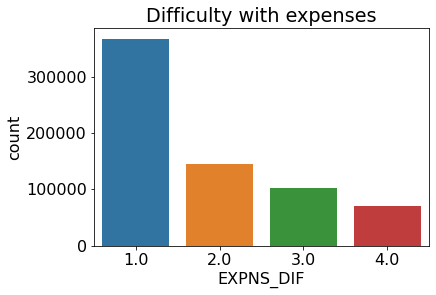

In [30]:
_ = sns.countplot(data=df, x='EXPNS_DIF')
_ = plt.title('Difficulty with expenses')

In [31]:
pd.crosstab(df.WEEK, df.EXPNS_DIF).apply(lambda r: r/r.sum(), axis=1)

EXPNS_DIF,1.0,2.0,3.0,4.0
WEEK,,,,
13.0,0.534653,0.216813,0.149628,0.098907
14.0,0.536206,0.214764,0.149054,0.099976
15.0,0.538613,0.213319,0.149344,0.098723
16.0,0.544011,0.211942,0.145644,0.098403
17.0,0.540166,0.209747,0.148257,0.101830
18.0,0.538696,0.207199,0.146440,0.107666
19.0,0.523185,0.214171,0.150795,0.111849
20.0,0.528396,0.204257,0.151130,0.116217


In [32]:
pd.crosstab(df.REGION, df.EXPNS_DIF).apply(lambda r: r/r.sum(), axis=1)

EXPNS_DIF,1.0,2.0,3.0,4.0
REGION,,,,
1.0,0.542140,0.216796,0.145795,0.095269
2.0,0.520171,0.209381,0.153713,0.116735
3.0,0.551379,0.212372,0.142048,0.094201
4.0,0.538291,0.212270,0.149768,0.099672


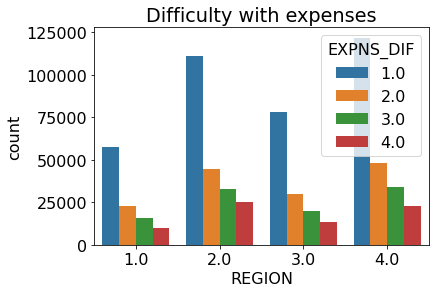

In [33]:
_ = sns.countplot(data=df, x='REGION', hue='EXPNS_DIF')
_ = plt.title('Difficulty with expenses')

In [34]:
expns_reg = df.groupby(['REGION', 'EXPNS_DIF']).count()
expns_reg = expns_reg/expns_reg.groupby(level=[0]).sum()*100

In [35]:
expns_reg.iloc[:, 1]

REGION  EXPNS_DIF
1.0     1.0          54.214016
        2.0          21.679596
        3.0          14.579538
        4.0           9.526851
2.0     1.0          52.017085
        2.0          20.938110
        3.0          15.371300
        4.0          11.673505
3.0     1.0          55.137859
        2.0          21.237191
        3.0          14.204835
        4.0           9.420115
4.0     1.0          53.829055
        2.0          21.226959
        3.0          14.976821
        4.0           9.967165
Name: WEEK, dtype: float64

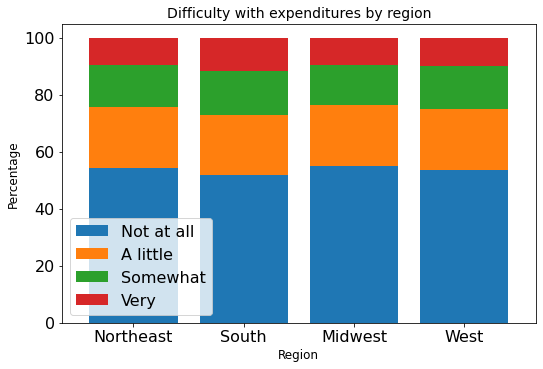

In [36]:
test = expns_reg.SCRAM.unstack('EXPNS_DIF').fillna(0)
legend = diff_expnd
labels = region

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(4), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Difficulty with expenditures by region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percentage', size=12)

In [37]:
expns_reg_race = df.groupby(['REGION', 'RRACE', 'EXPNS_DIF']).count()
expns_reg_race = expns_reg_race/expns_reg_race.groupby(level=[0]).sum()*100

In [38]:
expns_race_reg = expns_reg_race/expns_reg_race.groupby(level=[1]).sum()*100

In [39]:
expns_race_reg.iloc[:, 1].head()

REGION  RRACE  EXPNS_DIF
1.0     1.0    1.0          14.527495
               2.0           5.455919
               3.0           3.493537
               4.0           2.100014
        2.0    1.0           6.669157
Name: WEEK, dtype: float64

In [40]:
expns_reg_race.iloc[:, 1].head()

REGION  RRACE  EXPNS_DIF
1.0     1.0    1.0          48.376190
               2.0          18.168072
               3.0          11.633389
               4.0           6.992994
        2.0    1.0           1.993839
Name: WEEK, dtype: float64

In [41]:
expns_race_reg.head()

SCRAM       WEEK     EST_ST    EST_MSA  \
REGION RRACE EXPNS_DIF                                               
1.0    1.0   1.0        14.527495  14.527495  14.527495  15.082689   
             2.0         5.455919   5.455919   5.455919   5.450578   
             3.0         3.493537   3.493537   3.493537   3.383429   
             4.0         2.100014   2.100014   2.100014   2.047006   
       2.0   1.0         6.669157   6.669157   6.669157   6.501256   

                        TBIRTH_YEAR    EGENDER  RHISPANIC      EEDUC  \
REGION RRACE EXPNS_DIF                                                 
1.0    1.0   1.0          14.527495  14.527495  14.527495  14.527495   
             2.0           5.455919   5.455919   5.455919   5.455919   
             3.0           3.493537   3.493537   3.493537   3.493537   
             4.0           2.100014   2.100014   2.100014   2.100014   
       2.0   1.0           6.669157   6.669157   6.669157   6.669157   

                               MS  THHLD_NUMPER  ...  WHYCHNGD9  WHYCHNGD10  \
REGION RRACE EXPNS_DIF                           ...                          
1.0    1.0   1.0        14.534825     14.527495  ...  15.092593   12.241483   
             2.0         5.453500      5.455919  ...   6.130141    7.354762   
             3.0         3.490353      3.493537  ...   3.103455    4.421319   
             4.0         2.100901      2.100014  ...   1.262616    2.115464   
       2.0   1.0         6.671058      6.669157  ...   8.142636    6.060414   

                        WHYCHNGD11  WHYCHNGD12  FEWRTRIPS  FEWRTRANS  \
REGION RRACE EXPNS_DIF                                                 
1.0    1.0   1.0          9.894444   18.499019  14.642176  14.644873   
             2.0          7.239309    3.716507   5.373674   5.373187   
             3.0          5.212453    2.108805   3.451143   3.452204   
             4.0          3.281532    1.231876   2.093110   2.092979   
       2.0   1.0          4.814200   12.735772   6.813636   6.801355   

                        PLNDTRIPS  CNCLDTRPS     INCOME  GENERATION  
REGION RRACE EXPNS_DIF                                               
1.0    1.0   1.0        14.644756  15.184288  14.793141   14.527495  
             2.0         5.370103   5.289321   5.246517    5.455919  
             3.0         3.454302   3.260714   3.393188    3.493537  
             4.0         2.092791   1.828735   2.100158    2.100014  
       2.0   1.0         6.806901   7.031399   7.093456    6.669157  

[5 rows x 42 columns]

In [42]:
expns_reg_race.reset_index().head()

,REGION,RRACE,EXPNS_DIF,SCRAM,WEEK,EST_ST,EST_MSA,TBIRTH_YEAR,EGENDER,RHISPANIC,...,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME,GENERATION
0,1.0,1.0,1.0,48.376190,48.376190,48.376190,45.823661,48.376190,48.376190,48.376190,...,48.747032,38.407080,31.869131,63.512545,48.996830,48.994766,48.985959,51.337628,49.875172,48.376190
1,1.0,1.0,2.0,18.168072,18.168072,18.168072,16.559743,18.168072,18.168072,18.168072,...,19.799525,23.075221,23.317177,12.759857,17.981823,17.976123,17.962719,17.883037,17.688668,18.168072
2,1.0,1.0,3.0,11.633389,11.633389,11.633389,10.279407,11.633389,11.633389,11.633389,...,10.023740,13.871681,16.788852,7.240143,11.548493,11.549431,11.554462,11.024378,11.440154,11.633389
3,1.0,1.0,4.0,6.992994,6.992994,6.992994,6.219136,6.992994,6.992994,6.992994,...,4.078080,6.637168,10.569524,4.229391,7.004133,7.002112,7.000280,6.182898,7.080698,6.992994
4,1.0,2.0,1.0,1.993839,1.993839,1.993839,2.990335,1.993839,1.993839,1.993839,...,2.453179,2.323009,1.638897,2.724014,1.968220,1.968437,1.973079,1.909814,1.918779,1.993839


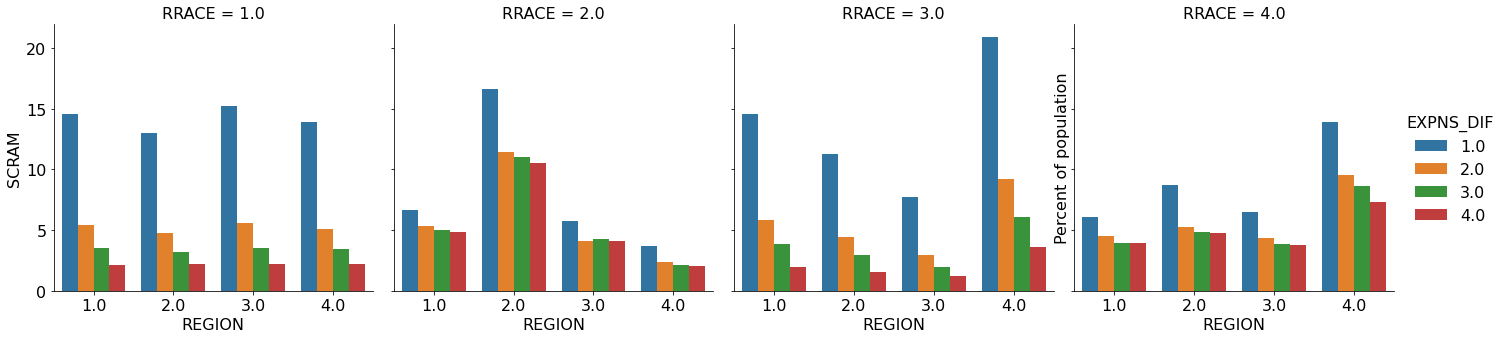

In [43]:
_ = sns.catplot(data=expns_race_reg.reset_index(), x='REGION', hue='EXPNS_DIF', y='SCRAM', col='RRACE', kind='bar')
_ = plt.ylabel('Percent of population')

In [44]:
expns_generation = df.groupby(['GENERATION', 'EXPNS_DIF']).count()
expns_generation = expns_generation/expns_generation.groupby(level=[0]).sum()*100

In [45]:
expns_generation.head()

SCRAM       WEEK     EST_ST    EST_MSA  \
GENERATION       EXPNS_DIF                                               
Baby Boomer      1.0        65.553979  65.553979  65.553979  64.250277   
                 2.0        18.751064  18.751064  18.751064  18.823030   
                 3.0        11.322736  11.322736  11.322736  11.988380   
                 4.0         4.372221   4.372221   4.372221   4.938312   
Generation Jones 1.0        55.526530  55.526530  55.526530  54.832643   

                               REGION  TBIRTH_YEAR    EGENDER  RHISPANIC  \
GENERATION       EXPNS_DIF                                                 
Baby Boomer      1.0        65.553979    65.553979  65.553979  65.553979   
                 2.0        18.751064    18.751064  18.751064  18.751064   
                 3.0        11.322736    11.322736  11.322736  11.322736   
                 4.0         4.372221     4.372221   4.372221   4.372221   
Generation Jones 1.0        55.526530    55.526530  55.526530  55.526530   

                                RRACE      EEDUC  ...  WHYCHNGD8  WHYCHNGD9  \
GENERATION       EXPNS_DIF                        ...                         
Baby Boomer      1.0        65.553979  65.553979  ...  72.169014  61.819900   
                 2.0        18.751064  18.751064  ...  18.535211  22.910760   
                 3.0        11.322736  11.322736  ...   7.154930  11.772647   
                 4.0         4.372221   4.372221  ...   2.140845   3.496692   
Generation Jones 1.0        55.526530  55.526530  ...  70.767717  60.095640   

                            WHYCHNGD10  WHYCHNGD11  WHYCHNGD12  FEWRTRIPS  \
GENERATION       EXPNS_DIF                                                  
Baby Boomer      1.0         54.153132   46.327921   75.080559  65.953112   
                 2.0         26.635731   27.608872   13.587540  18.569151   
                 3.0         14.431555   18.562982    8.378088  11.184599   
                 4.0          4.779582    7.500225    2.953813   4.293138   
Generation Jones 1.0         49.242279   37.485964   70.045045  55.929706   

                            FEWRTRANS  PLNDTRIPS  CNCLDTRPS     INCOME  
GENERATION       EXPNS_DIF                                              
Baby Boomer      1.0        65.926246  65.916560  67.933888  66.512881  
                 2.0        18.582829  18.572508  18.003493  18.281792  
                 3.0        11.196616  11.208444  10.350806  10.920656  
                 4.0         4.294310   4.302489   3.711812   4.284670  
Generation Jones 1.0        55.893181  55.892230  58.104318  56.527384  

[5 rows x 43 columns]

## CHANGES IN SHOPPING BEHAVIORS


### 1. PURCHASES

In [46]:
df = add_dates_start_end_inplace(df)

In [47]:
df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME,GENERATION,DATE_START,DATE_END
0,V130000001S12010403200123,13.0,48.0,19100.0,2.0,1989.0,1.0,1.0,1.0,6.0,...,NaN,NaN,2.0,2.0,2.0,NaN,2.0,Millennials,2020-08-19,2020-08-31
1,V130000001S34010154300113,13.0,1.0,NaN,2.0,1988.0,2.0,1.0,1.0,5.0,...,1.0,NaN,2.0,3.0,1.0,2.0,6.0,Millennials,2020-08-19,2020-08-31
2,V130000001S37010241600123,13.0,1.0,NaN,2.0,1969.0,1.0,2.0,2.0,4.0,...,NaN,NaN,1.0,1.0,1.0,1.0,7.0,Generation X,2020-08-19,2020-08-31
3,V130000001S37010645600123,13.0,1.0,NaN,2.0,1947.0,1.0,1.0,1.0,7.0,...,NaN,NaN,1.0,1.0,1.0,1.0,6.0,Baby Boomer,2020-08-19,2020-08-31
4,V130000001S70011963510113,13.0,1.0,NaN,2.0,1968.0,2.0,1.0,2.0,6.0,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,Generation X,2020-08-19,2020-08-31


In [48]:
df['PURCHASE'] = df[['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3']].apply(lambda x: purchase_modality(x['CHNGHOW1'], x['CHNGHOW2'], x['CHNGHOW3']), axis=1)

In [49]:
demographics = df.columns[0:14]

df_purchase = df.loc[:, list(demographics) + ['PURCHASE','GENERATION','DATE_START']]
df_purchase_valid = df_purchase.dropna(subset=['PURCHASE'])
df_purchase_valid.info()

temp = get_rct('PURCHASE', 'DATE_START', df_purchase_valid).pct_change().cumsum().reset_index()
temp 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417134 entries, 1 to 72482
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SCRAM          417134 non-null  object 
 1   WEEK           417134 non-null  float64
 2   EST_ST         417134 non-null  float64
 3   EST_MSA        138048 non-null  float64
 4   REGION         417134 non-null  float64
 5   TBIRTH_YEAR    417134 non-null  float64
 6   EGENDER        417134 non-null  float64
 7   RHISPANIC      417134 non-null  float64
 8   RRACE          417134 non-null  float64
 9   EEDUC          417134 non-null  float64
 10  MS             415264 non-null  float64
 11  THHLD_NUMPER   417134 non-null  float64
 12  THHLD_NUMKID   417134 non-null  float64
 13  THHLD_NUMADLT  417134 non-null  float64
 14  PURCHASE       417134 non-null  object 
 15  GENERATION     417134 non-null  object 
 16  DATE_START     417134 non-null  object 
dtypes: float64(13), object(4)
memo

PURCHASE,DATE_START,In-store,Online,Online + Pickup,Pickup
0,2020-08-19,NaN,NaN,NaN,NaN
1,2020-09-02,0.042578,0.009905,-0.016146,-0.032394
2,2020-09-16,0.050304,0.018434,-0.029867,-0.026572
3,2020-09-30,0.025112,0.024988,-0.026594,-0.054068
4,2020-10-14,-0.043427,0.043051,-0.027953,-0.083830
5,2020-10-28,-0.124247,0.051923,-0.024686,-0.066959
6,2020-11-11,-0.248919,0.053559,0.010321,-0.130307
7,2020-11-25,-0.497795,0.081938,0.034705,-0.236588


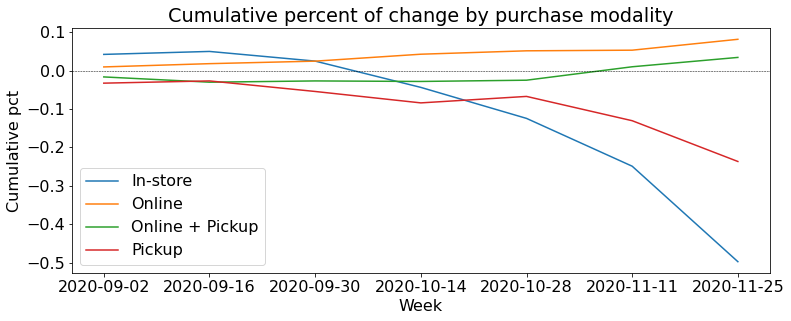

In [50]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y='In-store', x='DATE_START', data=temp, label='In-store')
_ = sns.lineplot(y='Online', x='DATE_START', data=temp, label='Online')
_ = sns.lineplot(y='Online + Pickup', x='DATE_START', data=temp, label='Online + Pickup')
_ = sns.lineplot(y='Pickup', x='DATE_START', data=temp, label='Pickup')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change by purchase modality')
_ = plt.rcParams.update({'font.size': 16})
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

In [51]:
temp1 = pd.crosstab(df_purchase_valid.DATE_START, [df_purchase_valid.PURCHASE, df_purchase_valid.REGION])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

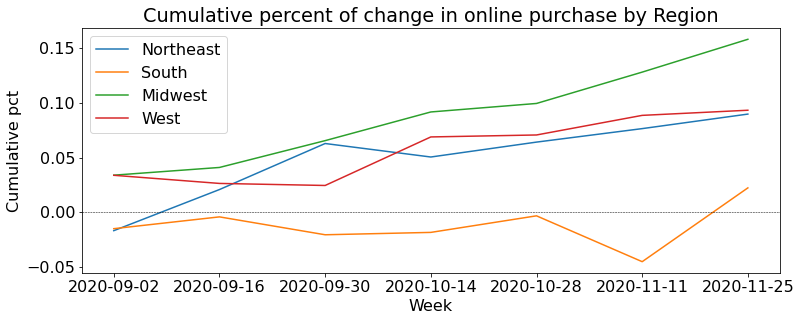

In [52]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y=temp2.columns[5], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[6], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change in online purchase by Region')
_ = plt.rcParams.update({'font.size': 16})
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

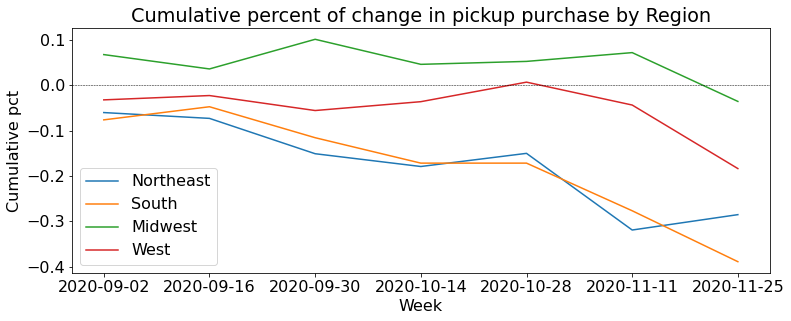

In [53]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y=temp2.columns[13], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[14], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[15], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[16], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change in pickup purchase by Region')
_ = plt.rcParams.update({'font.size': 16})
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

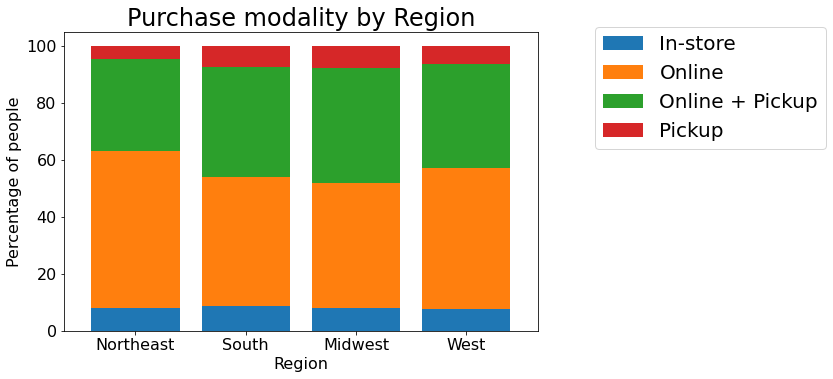

In [54]:
purchase_reg = df_purchase_valid.groupby(['REGION', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg .SCRAM.unstack('PURCHASE').fillna(0)
labels = region

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.rcParams.update({'font.size': 20})
_ = plt.title('Purchase modality by Region')
_ = plt.xlabel('Region')
_ = plt.ylabel('Percentage of people')
_ = ax.legend(bbox_to_anchor=(1.1, 1.05))

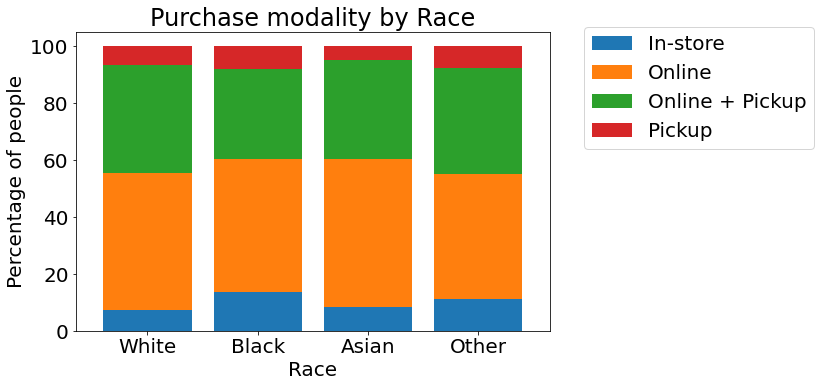

In [55]:
purchase_reg = df_purchase_valid.groupby(['RRACE', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg.SCRAM.unstack('PURCHASE').fillna(0)
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.rcParams.update({'font.size': 20})
_ = plt.title('Purchase modality by Race')
_ = plt.xlabel('Race')
_ = plt.ylabel('Percentage of people')
_ = ax.legend(bbox_to_anchor=(1.05, 1.05))

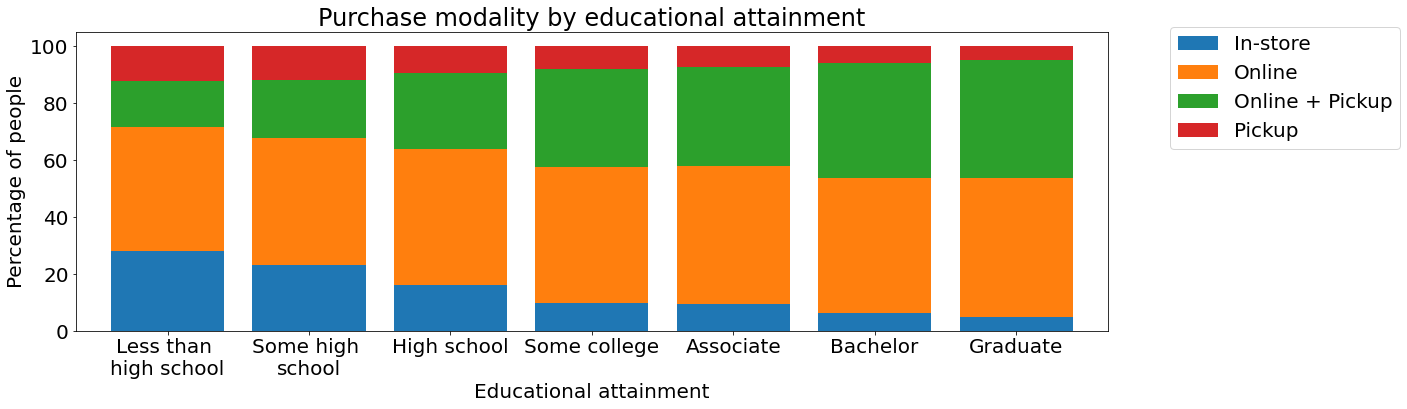

In [56]:
purchase_reg = df_purchase_valid.groupby(['EEDUC', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg.SCRAM.unstack('PURCHASE').fillna(0)
labels = educ

fig, ax = plt.subplots(figsize=(18.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.rcParams.update({'font.size': 20})
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.title('Purchase modality by educational attainment')
_ = plt.xlabel('Educational attainment')
_ = plt.ylabel('Percentage of people')
_ = ax.legend(bbox_to_anchor=(1.05, 1.05))

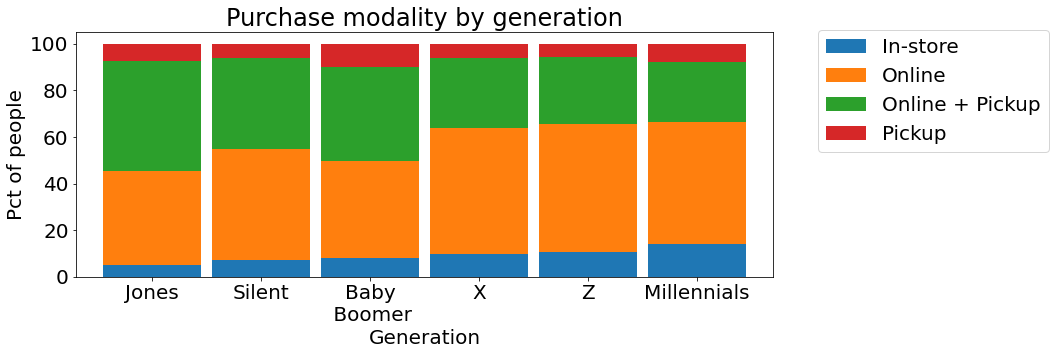

In [57]:
purchase_gen = df_purchase_valid.groupby(['GENERATION', 'PURCHASE']).count()
purchase_gen = purchase_gen/purchase_gen.groupby(level=[0]).sum()*100

test = purchase_gen.SCRAM.unstack('PURCHASE').fillna(0).sort_values('In-store')
labels = ['Jones', 'Silent', 'Baby\n Boomer', 'X', 'Z', 'Millennials']

fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.9)
_ = plt.rcParams.update({'font.size': 20})
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.title('Purchase modality by generation')
_ = plt.xlabel('Generation')
_ = plt.ylabel('Pct of people')
_ = ax.legend(bbox_to_anchor=(1.05, 1.05))

In [58]:
get_rctable('PURCHASE', 'EST_MSA', df_purchase_valid)

PURCHASE,In-store,Online,Online + Pickup,Pickup
EST_MSA,,,,
12060.0,8.590000,47.300000,38.470000,5.640000
14460.0,6.660000,55.970000,33.670000,3.700000
16980.0,7.620000,48.390000,37.910000,6.080000
19100.0,8.530000,41.070000,42.840000,7.560000
19820.0,9.660000,46.580000,36.890000,6.870000
26420.0,9.550000,40.290000,41.740000,8.430000
31080.0,6.990000,52.220000,36.140000,4.640000
33100.0,9.930000,54.180000,30.990000,4.900000
35620.0,8.940000,59.960000,27.190000,3.910000


## 2. PAYMENT

`CHNGHOW4` is refering to increase the use of credit cards or smartphone apps for purchases, `CHNGHOW5` is refering to increase the use of cash instead using credit cards or smartphones apps to purchases. 

In [59]:
x = df.loc[:, ['CHNGHOW4', 'CHNGHOW5']].idxmax(axis=1)
df['PAYMENT'] = x

df_payment = df.loc[:, list(demographics) + ['PAYMENT','GENERATION','DATE_START']]
df_payment_valid = df_payment.dropna(subset=['PAYMENT'])
df_payment_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275515 entries, 3 to 72482
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SCRAM          275515 non-null  object 
 1   WEEK           275515 non-null  float64
 2   EST_ST         275515 non-null  float64
 3   EST_MSA        93599 non-null   float64
 4   REGION         275515 non-null  float64
 5   TBIRTH_YEAR    275515 non-null  float64
 6   EGENDER        275515 non-null  float64
 7   RHISPANIC      275515 non-null  float64
 8   RRACE          275515 non-null  float64
 9   EEDUC          275515 non-null  float64
 10  MS             274287 non-null  float64
 11  THHLD_NUMPER   275515 non-null  float64
 12  THHLD_NUMKID   275515 non-null  float64
 13  THHLD_NUMADLT  275515 non-null  float64
 14  PAYMENT        275515 non-null  object 
 15  GENERATION     275515 non-null  object 
 16  DATE_START     275515 non-null  object 
dtypes: float64(13), object(4)
memo

In [60]:
get_rctable('PAYMENT', 'DATE_START', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
DATE_START,,
2020-08-19,92.280000,7.720000
2020-09-02,92.250000,7.750000
2020-09-16,92.300000,7.700000
2020-09-30,92.760000,7.240000
2020-10-14,92.720000,7.280000
2020-10-28,92.670000,7.330000
2020-11-11,93.400000,6.600000
2020-11-25,93.850000,6.150000


In [61]:
temp = get_rct('PAYMENT', 'DATE_START', df_payment_valid).pct_change().cumsum().reset_index()
temp 

PAYMENT,DATE_START,CHNGHOW4,CHNGHOW5
0,2020-08-19,NaN,NaN
1,2020-09-02,-0.000325,0.003886
2,2020-09-16,0.000217,-0.002566
3,2020-09-30,0.005201,-0.062306
4,2020-10-14,0.004769,-0.056781
5,2020-10-28,0.004230,-0.049913
6,2020-11-11,0.012108,-0.149504
7,2020-11-25,0.016926,-0.217685


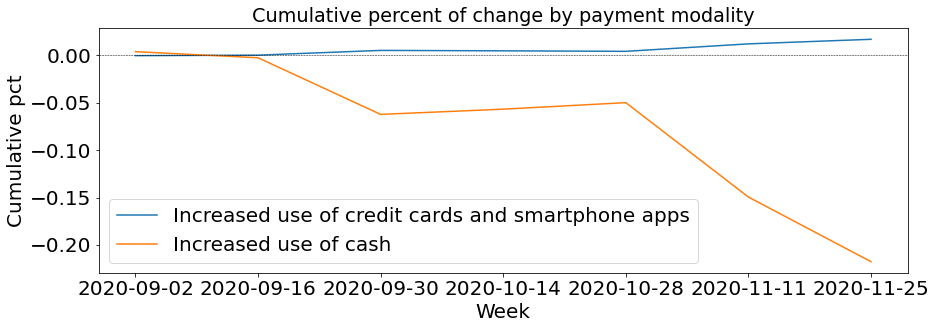

In [62]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(14.5, 4.5))
_ = sns.lineplot(y='CHNGHOW4', x='DATE_START', data=temp, label='Increased use of credit cards and smartphone apps')
_ = sns.lineplot(y='CHNGHOW5', x='DATE_START', data=temp, label='Increased use of cash')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Cumulative percent of change by payment modality')
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

In [63]:
temp1 = pd.crosstab(df_payment_valid.DATE_START, [df_payment_valid.PAYMENT, df_payment_valid.REGION])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

In [64]:
temp2.columns[1]

('CHNGHOW4', 1.0)

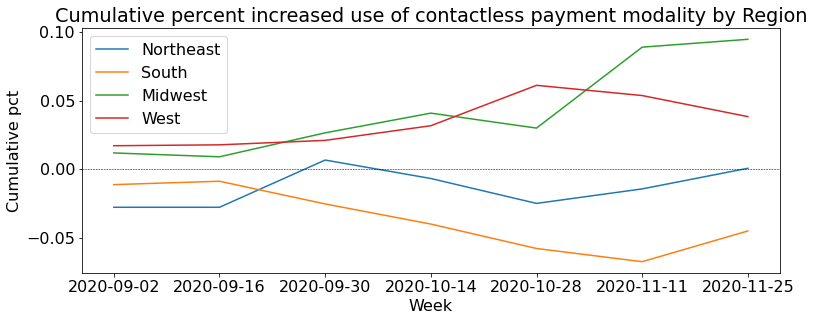

In [65]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y=temp2.columns[1], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[2], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[3], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[4], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Cumulative percent increased use of contactless payment modality by Region')
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

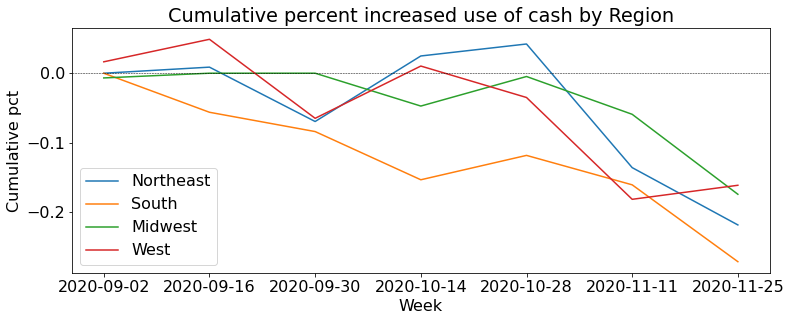

In [66]:
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y=temp2.columns[5], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[6], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Cumulative percent increased use of cash by Region')
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

In [67]:
get_rctable('PAYMENT', 'REGION', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
REGION,,
1.0,93.370000,6.630000
2.0,91.990000,8.010000
3.0,92.730000,7.270000
4.0,93.040000,6.960000


In [68]:
get_rctable('PAYMENT', 'RRACE', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
RRACE,,
1.0,93.260000,6.740000
2.0,87.560000,12.440000
3.0,95.360000,4.640000
4.0,89.930000,10.070000


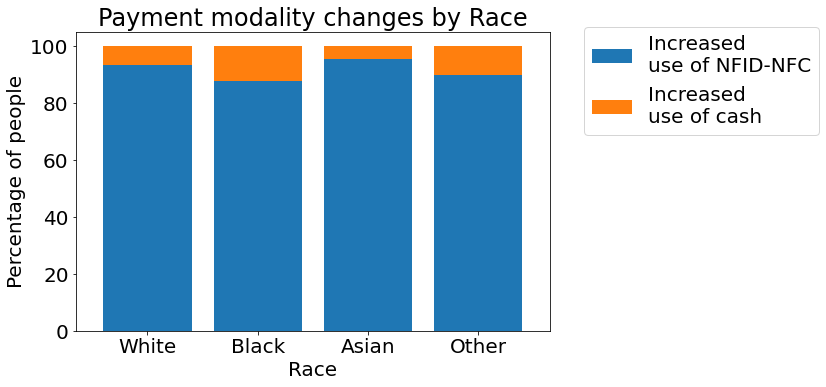

In [72]:
payment_educ = df_payment_valid.groupby(['RRACE', 'PAYMENT']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('PAYMENT').fillna(0)
legend = ['Increased \nuse of NFID-NFC', 'Increased \nuse of cash']
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.rcParams.update({'font.size': 20})
_ = plt.title('Payment modality changes by Race')
_ = plt.xlabel('Race')
_ = plt.ylabel('Percentage of people')
_ = ax.legend(legend, bbox_to_anchor=(1.05, 1.05))

In [73]:
get_rctable('PAYMENT', 'EEDUC', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
EEDUC,,
1.0,75.380000,24.620000
2.0,81.060000,18.940000
3.0,86.580000,13.420000
4.0,90.860000,9.140000
5.0,90.610000,9.390000
6.0,94.640000,5.360000
7.0,95.750000,4.250000


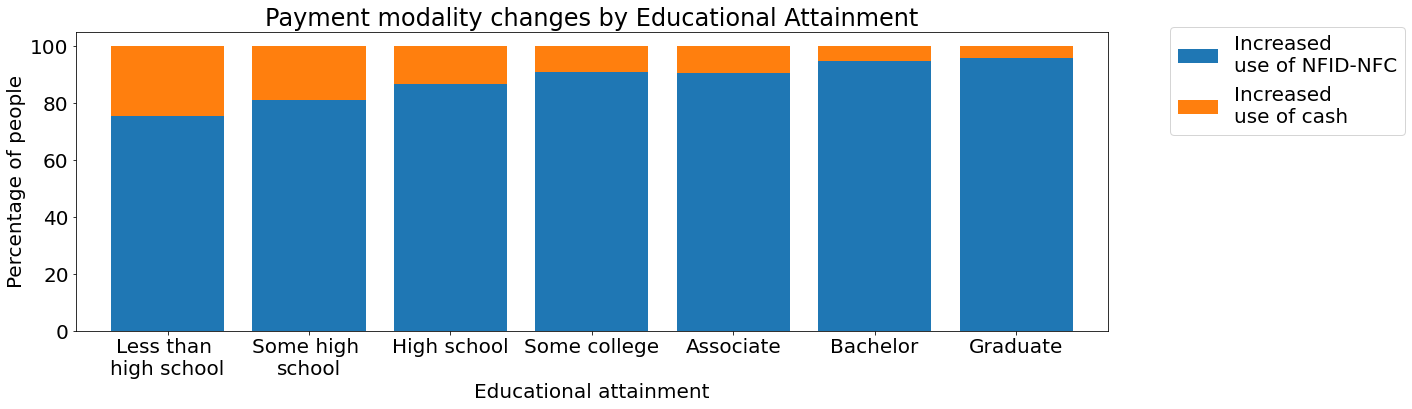

In [74]:
payment_educ = df_payment_valid.groupby(['EEDUC', 'PAYMENT']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('PAYMENT').fillna(0)
legend = ['Increased \nuse of NFID-NFC', 'Increased \nuse of cash']
labels = educ

fig, ax = plt.subplots(figsize=(18.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
#_ = plt.legend(legend, loc='lower left')
_ = plt.rcParams.update({'font.size': 20})
_ = plt.title('Payment modality changes by Educational Attainment')
_ = plt.xlabel('Educational attainment')
_ = plt.ylabel('Percentage of people')
_ = ax.legend(legend, bbox_to_anchor=(1.05, 1.05))

In [72]:
get_rctable('PAYMENT', 'GENERATION', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
GENERATION,,
Baby Boomer,90.6,9.4
Generation Jones,89.45,10.55
Generation X,93.14,6.86
Generation Z,95.5,4.5
Millennials,95.71,4.29
Silent Generation,90.6,9.4


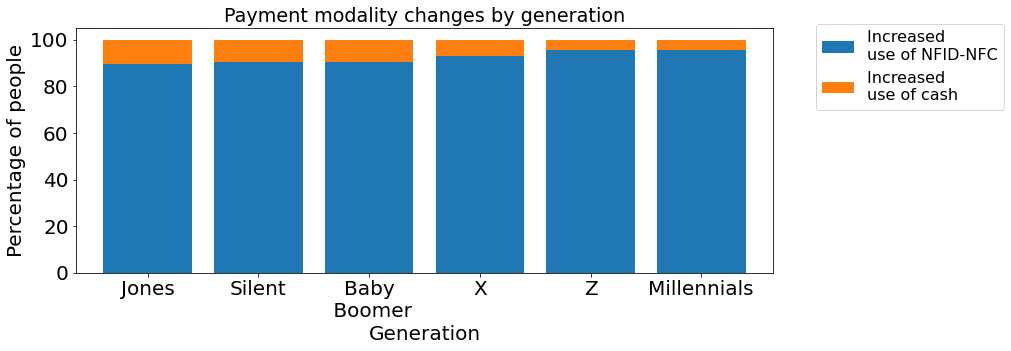

In [75]:
purchase_gen = df_payment_valid.groupby(['GENERATION', 'PAYMENT']).count()
purchase_gen = purchase_gen/purchase_gen.groupby(level=[0]).sum()*100

test = purchase_gen.SCRAM.unstack('PAYMENT').fillna(0).sort_values('CHNGHOW4')
legend = ['Increased \nuse of NFID-NFC', 'Increased \nuse of cash']
#labels = list(test.index)

labels = ['Jones', 'Silent', 'Baby\n Boomer', 'X', 'Z', 'Millennials']

fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Payment modality changes by generation')
_ = plt.xlabel('Generation')
_ = plt.ylabel('Percentage of people')
_ = ax.legend(legend, bbox_to_anchor=(1.05, 1.05))

In [76]:
get_rctable('PAYMENT', 'EST_MSA', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
EST_MSA,,
12060.0,92.730000,7.270000
14460.0,94.550000,5.450000
16980.0,94.340000,5.660000
19100.0,92.320000,7.680000
19820.0,92.000000,8.000000
26420.0,92.640000,7.360000
31080.0,93.800000,6.200000
33100.0,92.350000,7.650000
35620.0,93.290000,6.710000


#### 41860.0 (San Francisco-Oakland-Berkeley) and 42660.0 (Seattle-Tacoma-Bellevue) are the most contactless metro-areas. On the other hand, 40140.0 (Riverside-San Bernardino-Ontario) is the metro-area which reveals more use of cash.

## Restaurants

In [ ]:
demographics = df.columns[0:14]

x = df.loc[:, ['CHNGHOW6', 'CHNGHOW7']].idxmax(axis=1)
df['RESTAURANTS'] = x

df_restaurant = df.loc[:, list(demographics) + ['RESTAURANTS','GENERATION','DATE_START']]
df_restaurant_valid = df_restaurant.dropna(subset=['RESTAURANTS'])
df_restaurant_valid.info()

In [76]:
get_rctable('RESTAURANTS', 'DATE_START', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
DATE_START,,
2020-08-19,86.48,13.52
2020-09-02,85.56,14.44
2020-09-16,85.42,14.58
2020-09-30,85.5,14.5
2020-10-14,86.35,13.65
2020-10-28,87.67,12.33
2020-11-11,91.27,8.73
2020-11-25,93.66,6.34


In [77]:
temp = get_rct('RESTAURANTS', 'DATE_START', df_restaurant_valid).pct_change().cumsum().reset_index()
temp 

RESTAURANTS,DATE_START,CHNGHOW6,CHNGHOW7
0,2020-08-19,NaN,NaN
1,2020-09-02,-0.010638,0.068047
2,2020-09-16,-0.012275,0.077743
3,2020-09-30,-0.011338,0.072256
4,2020-10-14,-0.001397,0.013635
5,2020-10-28,0.013890,-0.083068
6,2020-11-11,0.054953,-0.375039
7,2020-11-25,0.081139,-0.648808


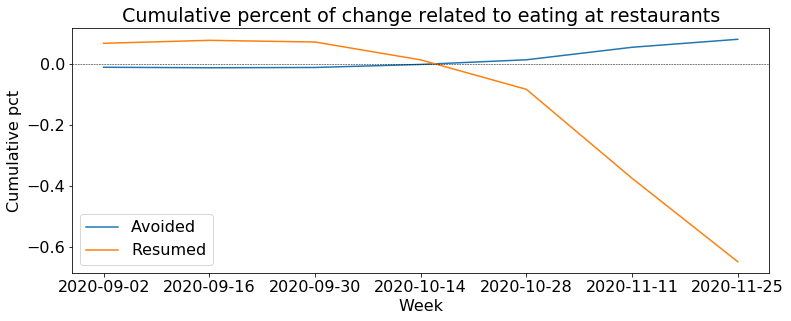

In [78]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y='CHNGHOW6', x='DATE_START', data=temp, label='Avoided')
_ = sns.lineplot(y='CHNGHOW7', x='DATE_START', data=temp, label='Resumed')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Cumulative percent of change related to eating at restaurants')
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

In [79]:
temp1 = pd.crosstab(df_restaurant_valid.DATE_START, [df_restaurant_valid.RESTAURANTS, df_restaurant_valid.REGION])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

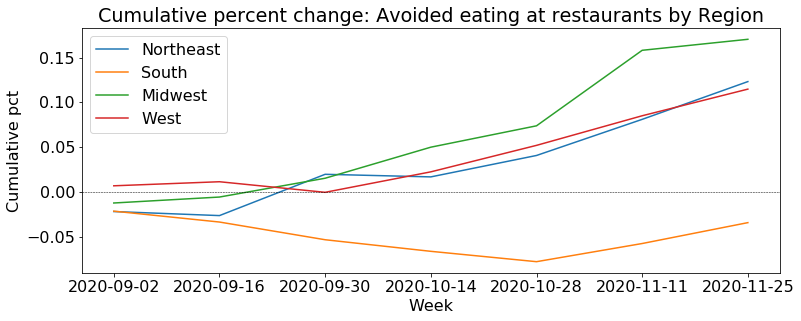

In [80]:
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y=temp2.columns[1], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[2], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[3], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[4], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Cumulative percent change: Avoided eating at restaurants by Region')
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

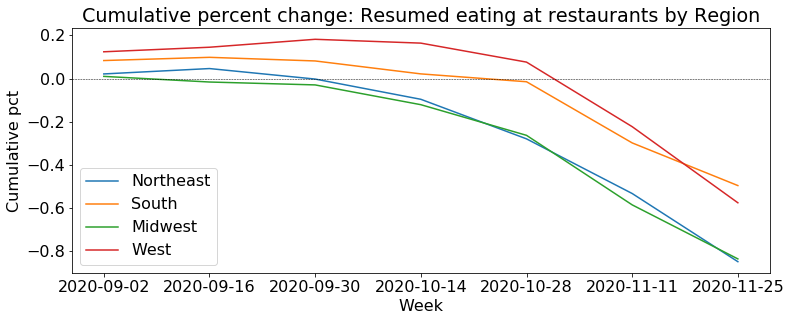

In [81]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(12.5, 4.5))
_ = sns.lineplot(y=temp2.columns[5], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[6], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Cumulative percent change: Resumed eating at restaurants by Region')
_ = plt.xlabel('Week')
_ = plt.ylabel('Cumulative pct')

In [82]:
get_rctable('RESTAURANTS', 'REGION', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
REGION,,
1.0,87.2,12.8
2.0,86.49,13.51
3.0,87.23,12.77
4.0,88.42,11.58


In [83]:
payment_educ = df_restaurant_valid.groupby(['REGION', 'RESTAURANTS']).count()

In [84]:
#payment_educ = df_restaurant_valid.groupby(['REGION', 'RESTAURANTS']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

In [85]:
test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Avoided', 'Resumed']
labels = region

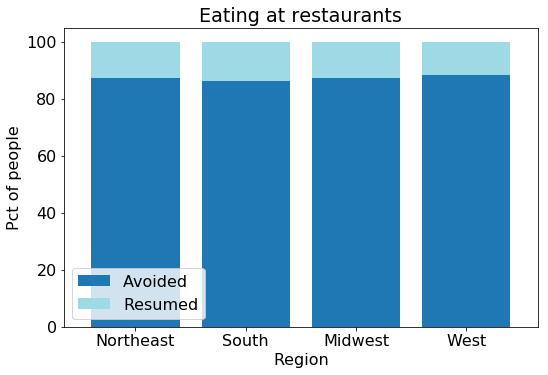

In [86]:
fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Eating at restaurants')
_ = plt.xlabel('Region')
_ = plt.ylabel('Percentage of people')

In [87]:
get_rctable('RESTAURANTS', 'RRACE', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
RRACE,,
1.0,86.36,13.64
2.0,93.07,6.93
3.0,92.3,7.7
4.0,90.04,9.96


In [88]:
payment_educ = df_restaurant_valid.groupby(['RRACE', 'RESTAURANTS']).count()

In [89]:
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

In [90]:
test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Avoided', 'Resumed']
labels = race

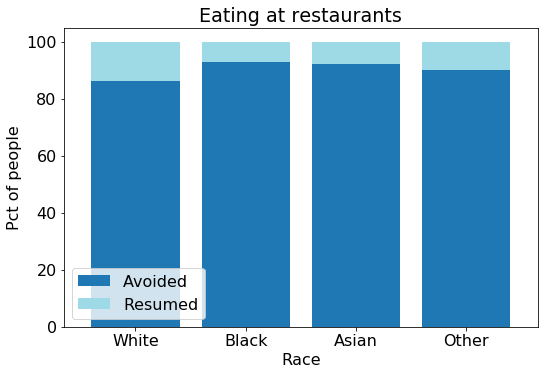

In [91]:
fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Eating at restaurants')
_ = plt.xlabel('Race')
_ = plt.ylabel('Percentage of people')

In [92]:
get_rctable('RESTAURANTS', 'EEDUC', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
EEDUC,,
1.0,93.4,6.6
2.0,93.34,6.66
3.0,88.73,11.27
4.0,87,13
5.0,86.43,13.57
6.0,86.02,13.98
7.0,88.77,11.23


In [93]:
payment_educ = df_restaurant_valid.groupby(['EEDUC', 'RESTAURANTS']).count()

In [94]:
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

In [95]:
test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Avoided', 'Resumed']
labels = educ

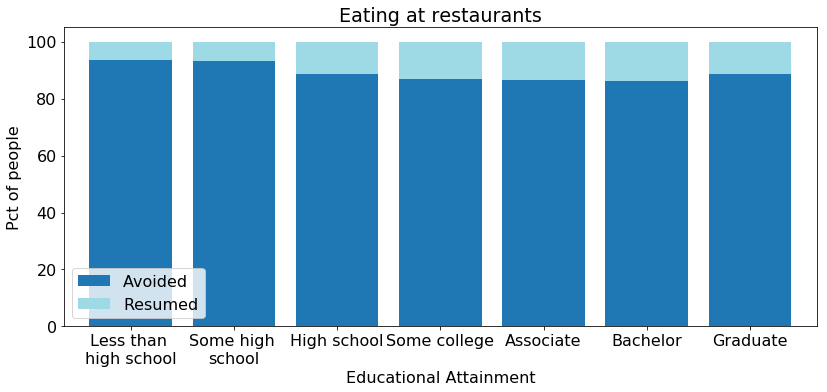

In [96]:
fig, ax = plt.subplots(figsize=(18.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.rcParams.update({'font.size': 20})
_ = plt.title('Eating at restaurants')
_ = plt.xlabel('Educational Attainment')
_ = plt.ylabel('Percentage of people')
_ = ax.legend(bbox_to_anchor=(1.05, 1.05))

In [97]:
get_rctable('RESTAURANTS', 'GENERATION', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
GENERATION,,
Baby Boomer,88.27,11.73
Generation Jones,87.71,12.29
Generation X,86.92,13.08
Generation Z,83.61,16.39
Millennials,87.47,12.53
Silent Generation,87.8,12.2


In [98]:
restaurant_gen = df_restaurant_valid.groupby(['GENERATION', 'RESTAURANTS']).count()

In [99]:
restaurant_gen = restaurant_gen/restaurant_gen.groupby(level=[0]).sum()*100

In [100]:
test = restaurant_gen.SCRAM.unstack('RESTAURANTS').fillna(0).sort_values('CHNGHOW6')
legend = ['Avoided', 'Resumed']
#labels = list(test.index)
labels = ['Z', 'X', 'Millenials', 'Jones', 'Silent', 'Baby Boomer']

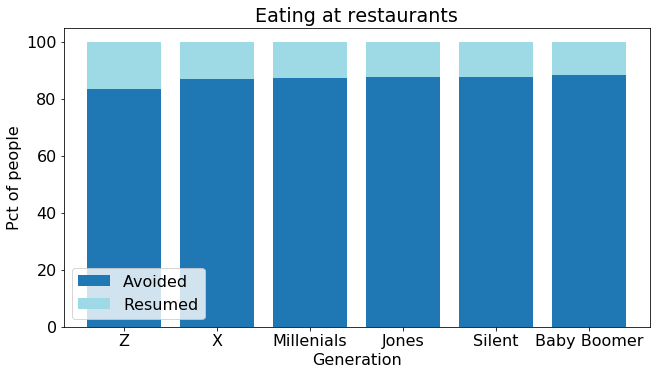

In [101]:
fig, ax = plt.subplots(figsize=(10.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.rcParams.update({'font.size': 16})
_ = plt.title('Eating at restaurants')
_ = plt.xlabel('Generation')
_ = plt.ylabel('Pct of people')

In [102]:
get_rctable('RESTAURANTS', 'EST_MSA', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
EST_MSA,,
12060.0,86.59,13.41
14460.0,87.68,12.32
16980.0,89.08,10.92
19100.0,84.79,15.21
19820.0,85.4,14.6
26420.0,84.75,15.25
31080.0,90.7,9.3
33100.0,88.63,11.37
35620.0,86.28,13.72


In [103]:
purchase_msa = get_rct('PURCHASE', 'EST_MSA', df_purchase_valid)
payment_msa = get_rct('PAYMENT', 'EST_MSA', df_payment_valid)
restaurants_msa = get_rct('RESTAURANTS', 'EST_MSA', df_restaurant_valid)

In [104]:
df_msa_shopping = purchase_msa.merge(payment_msa, left_on='EST_MSA', right_on='EST_MSA').merge(restaurants_msa, left_on='EST_MSA', right_on='EST_MSA')

In [105]:
def get_name(est_msa):
    return msa[str(int(est_msa))]

In [106]:
df_msa_shopping.reset_index(inplace=True)
df_msa_shopping['MSA_NAME'] = df_msa_shopping['EST_MSA'].apply(get_name)

In [107]:
df_msa_shopping

,EST_MSA,In-store,Online,Online + Pickup,Pickup,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,MSA_NAME
0,12060.0,8.59,47.30,38.47,5.64,92.73,7.27,86.59,13.41,Atlanta-Sandy Springs-Alpharetta
1,14460.0,6.66,55.97,33.67,3.70,94.55,5.45,87.68,12.32,Boston-Cambridge-Newton
2,16980.0,7.62,48.39,37.91,6.08,94.34,5.66,89.08,10.92,Chicago-Naperville-Elgin
3,19100.0,8.53,41.07,42.84,7.56,92.32,7.68,84.79,15.21,Dallas-Fort Worth-Arlington
4,19820.0,9.66,46.58,36.89,6.87,92.00,8.00,85.40,14.60,Detroit-Warren-Dearborn
5,26420.0,9.55,40.29,41.74,8.43,92.64,7.36,84.75,15.25,Houston-The Woodlands-Sugar Land
6,31080.0,6.99,52.22,36.14,4.64,93.80,6.20,90.70,9.30,Los Angeles-Long Beach-Anaheim
7,33100.0,9.93,54.18,30.99,4.90,92.35,7.65,88.63,11.37,Miami-Fort Lauderdale-Pompano Beach
8,35620.0,8.94,59.96,27.19,3.91,93.29,6.71,86.28,13.72,New York-Newark-Jersey City
9,37980.0,8.29,53.34,33.55,4.83,92.59,7.41,87.97,12.03,Philadelphia-Camden-Wilmington


In [108]:
#df_msa_shopping.to_csv('../data/processed/shopping_statistics_msa.csv', index=False)